In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import caffe
import setproctitle
import os, sys
import surgery, score
import tools
from copy import copy
import time
import setup
import training_tools as tt

In [15]:
setproctitle.setproctitle(os.path.basename(os.getcwd()))

caffe_root = '/home/cv/hdl/caffe'
models = '{}/models'.format(caffe_root)
voc_dir = '{}/data/pascal/VOC/VOC2010'.format(caffe_root)
snapshot = 'snapshot'
part1 = 'head'
part2 = 'torso'
joint_parts = 'head+torso'
parts = [part1, part2, joint_parts]

# generated using **new** fcn_net_surgery.ipynb
weights = 'vgg_no_bilinear_vgg16fc.caffemodel'
classes = np.asarray(['background', 'head', 'torso', 'head+torso', 'left arm', 'right arm', 'arms', 'left leg', 'right leg', 'legs', 'person'])


In [16]:
# setup
t = time.time()
setup.training_setup(models, parts)
setup.model_setup(parts)

In [17]:
net1 = tt.get_net(part1)
layers = [l for l in net1.params.keys() if 'up' not in l]

SyntaxError: invalid syntax (<ipython-input-17-0a1f21a34173>, line 1)

In [5]:
# for _ in range(10):
#     solver.step(8000)
#     score.seg_tests(solver, seg_results, val_joint, layer='score')
net_joint_params = {l: (net_joint_solver.net.params[l][0].data, net_joint_solver.net.params[l][1].data) for l in layers}
for _ in range(800):
    net_1_solver.step(100)
    net_2_solver.step(100)
    net_joint_solver.step(100)
    # if net is loaded via caffe.Net('train.prototxt', caffe.TRAIN) does it have the weights? or do you need to load it
    # through the solver (as below) or thru caffe.Net('x.prototxt', 'x.caffemodel', caffe.TEST)?
    maximas = max_params(net_1_solver.net, net_2_solver.net, layers)
    copy_params = (maximas, net_joint_params, layers)
#     for l in layers:
#         net_joint_params[l][0].flat = maximas[l][0].flat  # flat unrolls the arrays
#         net_joint_params[l][1][...] = maximas[l][1]
    print 'Net 1 Loss = ', net_1_solver.net.blobs['loss'].data
    print 'Net 2 Loss = ', net_2_solver.net.blobs['loss'].data
    net_joint_solver.net.forward()
    print 'Joint Net Loss = ', net_joint_solver.net.blobs['loss'].data

TypeError: return arrays must be of ArrayType

In [5]:
elapsed = time.time() - t
print 'Time elapse: %ds' % elapsed

Time elapse: 43679s


In [48]:
# for _ in range(800):
#     net_1_solver.step(100)
#     net_2_solver.step(100)
#     net_joint_solver.step(100)
#     compute_joint_avg(net_1, net_2, net_joint)
# #     score.seg_tests(net_joint_solver, False, val_joint, layer='score')

KeyboardInterrupt: 

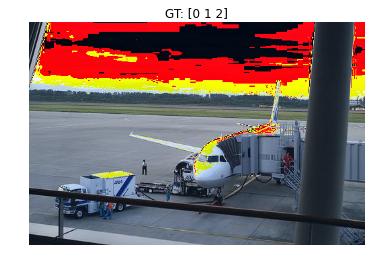

In [20]:
net_2_solver.step(1)
transformer = tools.SimpleTransformer() # This is simply to add back the bias, re-shuffle the color channels to RGB, and so on...
image_index = 0 # First image in the batch.
plt.figure()
plt.imshow(transformer.deprocess(copy(net_2_solver.net.blobs['data'].data[image_index, ...])))
gtlist = net_2_solver.net.blobs['label'].data[image_index, ...].astype(np.int)
# plt.title('GT: {}'.format(classes[np.unique(gtlist)]))
plt.title('GT: {}'.format(np.unique(gtlist)))
plt.axis('off');

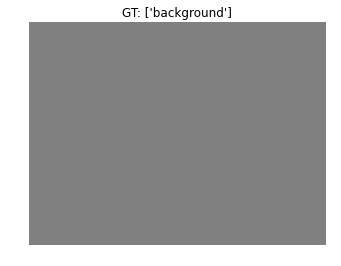

In [5]:
print net_1.params['conv1_1'][0].data

[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 ..., 
 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]


In [ ]:
for _ in range(1):
    net_1_solver.step(1000)
#     net_2_solver.step(100)
#     net_joint_solver.step(100)
#     # find average across all three networks, assign to net_joint
#     compute_joint_avg(net_1, net_2, net_joint)

In [11]:
print net_1.params['upscore'][0].data

[[[[ 0.00024414  0.00073242  0.0012207  ...,  0.0012207   0.00073242
     0.00024414]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   ..., 
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.00024414  0.00073242  0.0012207  ...,  0.0012207   0.00073242
     0.00024414]]

  [[ 0.00024414  0.00073242  0.0012207  ...,  0.0012207   0.00073242
     0.00024414]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   ..., 
   [ 0.0012207   0.00366211  0.00610352 ...,  0.00610352  0.00366211
     0.0012207 ]
   [ 0.00073242  0.00219727  0.00366211 ...,  0.00366211  0.00219727
     0.00073242]
   [ 0.00024414  0.00073242  0.001

In [5]:
net_1_solver.step(1)

In [7]:
print net_1.params['conv1_1'][0].data

[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 ..., 
 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]


In [13]:
net_2.forward()
net_2.params['conv1_1'][0].data

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,

In [6]:
net_joint.forward()
net_joint.params['conv1_1'][0].data

array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]]],


       [[[ 0.,  0.,

In [7]:
net_joint.forward()
net_joint.params['upscore'][0].data

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ..., 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0., 